# Support Vector Machine [SVM]

         SVM is a powerful and flexible class of supervised algorithm.It finds the line or a curve in two dimension or in
multiple dimensions that divides the classes from eachother.

# Importing Library

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from scipy import stats

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import seaborn as sns;sns.set()

# Reading the Data

In [2]:
df=pd.read_csv("C:/Users/Gaurav/Desktop/GIT/MODEL/Machine Learning Algorithms/5. SVM/ad_data.csv")
df.head()

,relevance_score,ad_length,has_clicked
0,1.412816,1.530335,1
1,1.813361,1.631131,1
2,1.432893,4.376792,0
3,1.872718,4.180692,0
4,2.095178,1.079147,1


In [3]:
df.shape

(50, 3)

In [4]:
df.describe()

,relevance_score,ad_length,has_clicked
count,50.000000,50.000000,50.000000
mean,1.500291,2.626178,0.500000
std,0.818878,1.773245,0.505076
min,-0.555524,-0.138106,0.000000
25%,1.018468,1.001077,0.000000
50%,1.539556,2.575253,0.500000
75%,2.096398,4.207599,1.000000
max,3.185158,5.474253,1.000000


In [5]:
dep="has_clicked"

ind=df.columns.tolist()
ind.remove(dep)
ind

['relevance_score', 'ad_length']

# Visualization

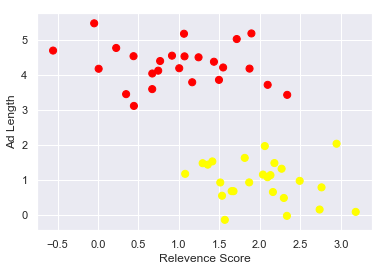

In [6]:
x=df[ind].values

y=df[dep].values

plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plt.xlabel("Relevence Score")
plt.ylabel("Ad Length")
plt.show()

We can draw these lines manually:

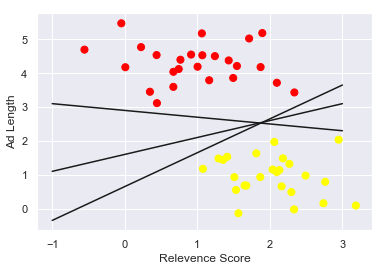

In [7]:
xfit=np.linspace(-1,3,5)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')
plt.xlabel("Relevence Score")
plt.ylabel("Ad Length")


for a,b in [(1,0.65),(0.5,1.6),(-0.2,2.9)]:
    plt.plot(xfit,a*xfit+b,'-k')

              But there can be many such line.But which is my best decision boundary.
In SVM the line that maximizes this margin is the one we will choose  as a optimal model.

# Fitting SVM

In [8]:
#Splitting train and test data
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [9]:
#Building the model
model=SVC(kernel="linear",C=1E10)
model.fit(xtrain,ytrain)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [10]:
pred=model.predict(xtest)

accuracy_score(pred,ytest)

1.0

To visualize the decision boundary

In [15]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

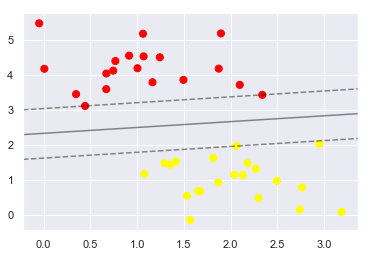

In [16]:
plt.scatter(xtrain[:,0],xtrain[:,1],c=ytrain,s=50,cmap='autumn')
plot_svc_decision_function(model);

In [13]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

# Kernal Tricks

In [17]:
from sklearn.datasets.samples_generator import make_circles

In [23]:
X,Y=make_circles(100,factor=.1,noise=.1)

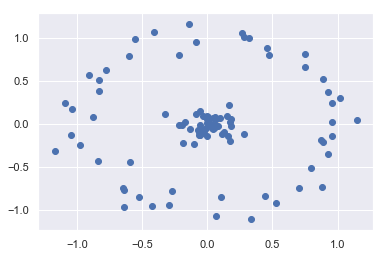

In [26]:
plt.scatter(X[:,0],X[:,1])

In [27]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=0)

In [29]:
model=SVC(kernel="linear")
model.fit(xtrain,ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

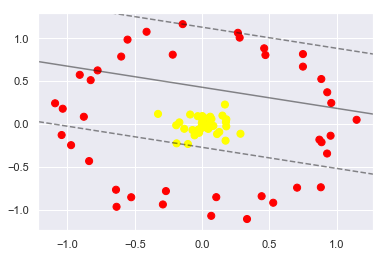

In [39]:
plt.scatter(xtrain[:,0],xtrain[:,1],c=ytrain,s=50,cmap="autumn")
plot_svc_decision_function(model,plot_support=False);

In [40]:
pred=model.predict(xtest)
accuracy_score(pred,ytest)

0.65

           The model is not much accurate so we should play with kernal.We need to transform our datapoint.The video
shows how the transformation take place.
 We here use rbf(Radial Basic Function) for transformation

In [44]:
model=SVC(kernel='rbf',C=1E6)
model.fit(xtrain,ytrain)

C:\Users\Gaurav\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

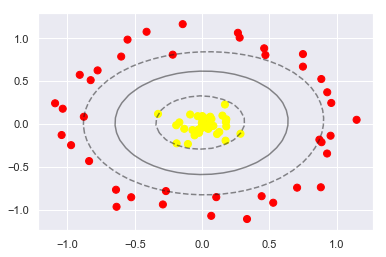

In [45]:
plt.scatter(xtrain[:,0],xtrain[:,1],c=ytrain,s=50,cmap="autumn")
plot_svc_decision_function(model,plot_support=False);

In [46]:
pred=model.predict(xtest)
accuracy_score(pred,ytest)

1.0